In [2]:
# import packages
from astropy.io import fits
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from lmfit import Model, fit_report
from lmfit.models import LinearModel

import os

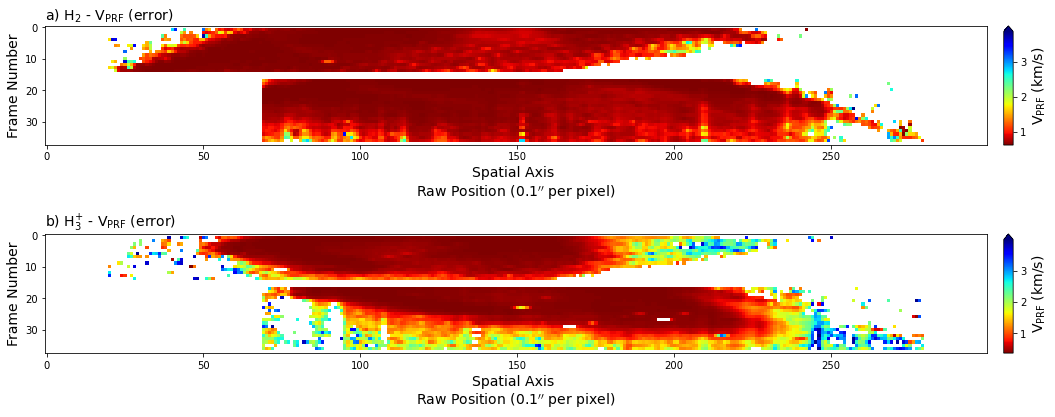

<Figure size 1728x576 with 0 Axes>

In [10]:
h2_vprf = fits.open('h2_vprf.fits', ignore_missing_end=True)[0].data
h3p_vprf = fits.open('h3p_vprf.fits', ignore_missing_end=True)[0].data
h2_verr = fits.open('h2_verr.fits', ignore_missing_end=True)[0].data
h3p_verr = fits.open('h3p_verr.fits', ignore_missing_end=True)[0].data
h2_int = fits.open('h2_int_shifted.fits', ignore_missing_end=True)[0].data
h3p_int = fits.open('h3p_int_shifted.fits', ignore_missing_end=True)[0].data

h2_vprf[h2_verr > 4] = np.nan
h3p_vprf[h3p_verr > 4] = np.nan

h2_vprf[h2_vprf > 4] = np.nan
h3p_vprf[h3p_vprf > 4] = np.nan
h2_vprf[h2_vprf < -4] = np.nan
h3p_vprf[h3p_vprf < -4] = np.nan

h2_vprf[:,:20] = np.nan
h3p_vprf[:,:20] = np.nan
h2_vprf[:,280:] = np.nan
h3p_vprf[:,280:] = np.nan

h2_verr[np.isnan(h2_vprf)] = np.nan
h3p_verr[np.isnan(h3p_vprf)] = np.nan
h2_int[np.isnan(h2_vprf)] = np.nan
h3p_int[np.isnan(h3p_vprf)] = np.nan

h2_vprf2 = h2_vprf + 0
h2_vprf2[h2_vprf2 > 2] = np.nan
h2_vprf2[h2_vprf2 < -2] = np.nan
h2_vprf2[np.isnan(h2_vprf)] = np.nan

# fig = plt.figure(figsize=(24,8), tight_layout=True)

# fig.add_subplot(311)
# plt.imshow(h2_vprf*(-1), cmap='jet_r')
# plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('Frame Number', fontsize=14)
# plt.title('a) H$_2$ - V$_{\mathrm{PRF}}$ (spatial removed)', loc='left', fontsize=14)
# plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

# fig.add_subplot(312)
# plt.imshow(h3p_vprf*(-1), cmap='jet_r')
# plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('Frame Number', fontsize=14)
# plt.title('b) H$_3^{+}$ - V$_{\mathrm{PRF}}$ (spatial removed)', loc='left', fontsize=14)
# plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

fig = plt.figure(figsize=(24,8), tight_layout=True)

fig.add_subplot(311)
plt.imshow(h2_verr, cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('a) H$_2$ - V$_{\mathrm{PRF}}$ (error)', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

fig.add_subplot(312)
plt.imshow(h3p_verr, cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('b) H$_3^{+}$ - V$_{\mathrm{PRF}}$ (error)', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

fig = plt.figure(figsize=(24,8), tight_layout=True)

# fig.add_subplot(311)
# plt.imshow(h2_int, cmap='gist_heat', norm=colors.PowerNorm(gamma=0.2))
# plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('Frame Number', fontsize=14)
# plt.title('a) H$_2$ - Intensity', loc='left', fontsize=14)
# plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=14)

# fig.add_subplot(312)
# plt.imshow(h3p_int, cmap='gist_heat', norm=colors.PowerNorm(gamma=0.2))
# plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('Frame Number', fontsize=14)
# plt.title('b) H$_2$ - Intensity', loc='left', fontsize=14)
# plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=14)

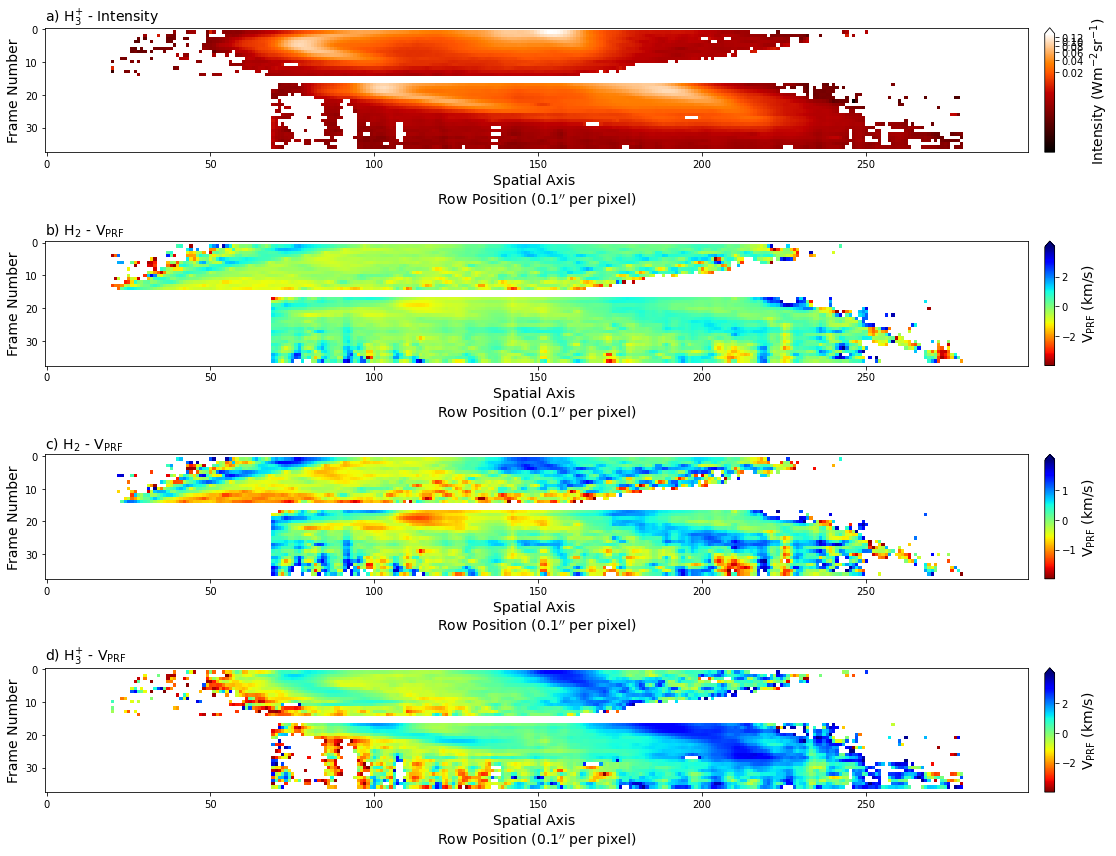

In [11]:
fig = plt.figure(figsize=(24,12), tight_layout=True)

fig.add_subplot(411)
plt.imshow(h3p_int, cmap='gist_heat', norm=colors.PowerNorm(gamma=0.2))
plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('a) H$_3^{+}$ - Intensity', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=14)

fig.add_subplot(412)
plt.imshow(h2_vprf*(-1), cmap='jet_r')
plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('b) H$_2$ - V$_{\mathrm{PRF}}$', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

fig.add_subplot(413)
plt.imshow(h2_vprf2*(-1), cmap='jet_r')
plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('c) H$_2$ - V$_{\mathrm{PRF}}$', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

fig.add_subplot(414)
plt.imshow(h3p_vprf*(-1), cmap='jet_r')
plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('d) H$_3^{+}$ - V$_{\mathrm{PRF}}$', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

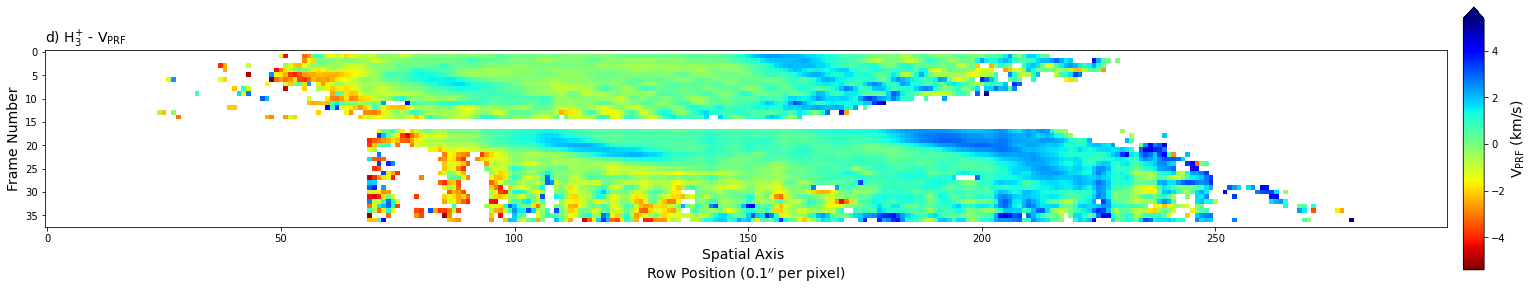

In [12]:
fig = plt.figure(figsize=(24,12), tight_layout=True)

fig.add_subplot(313)
plt.imshow(h3p_vprf*(-1)-h2_vprf2*(-1), cmap='jet_r')
plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('d) H$_3^{+}$ - V$_{\mathrm{PRF}}$', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

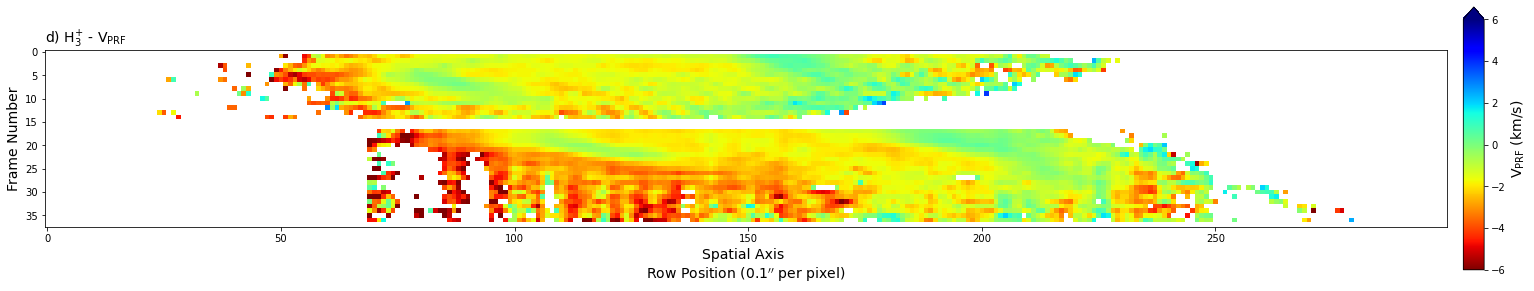

In [13]:
subtract = h3p_vprf*(-1)-h2_vprf2*(-1) + 0

subtract[16:] = subtract[16:] - 1

subtract = subtract - 1.5


fig = plt.figure(figsize=(24,12), tight_layout=True)

fig.add_subplot(313)
plt.imshow(subtract, cmap='jet_r', vmin=-6, vmax=6)
plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('d) H$_3^{+}$ - V$_{\mathrm{PRF}}$', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

In [15]:
notebook_path = os.path.abspath('h2_h3p_vel_compare.ipynb' + "/../")
imgpath = os.path.join(os.path.dirname(notebook_path), 'images/h2_h3p_int_vel')

fig.savefig(imgpath + '/h2_h3p_int_vel_compare', dpi=400, bbox_inches='tight', facecolor='white')

In [16]:
imgpath + '/h2_h3p_int_vel_compare'

'/Users/RuoyanWang/Documents/LEICESTER/h3p/02jun17/images/h2_h3p_int_vel/h2_h3p_int_vel_compare'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


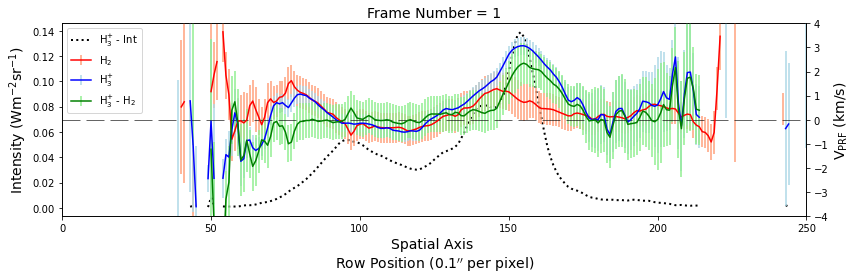

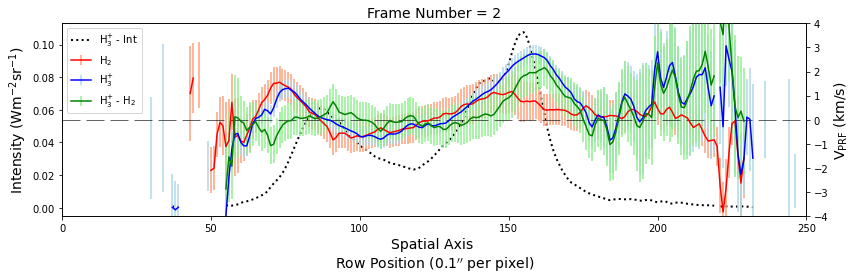

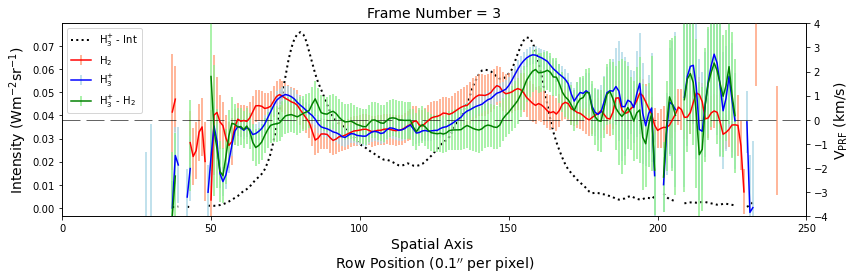

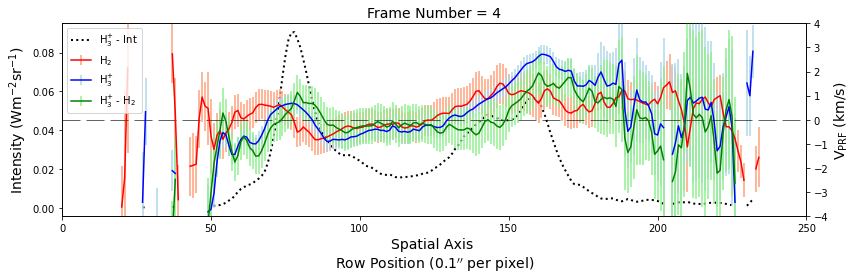

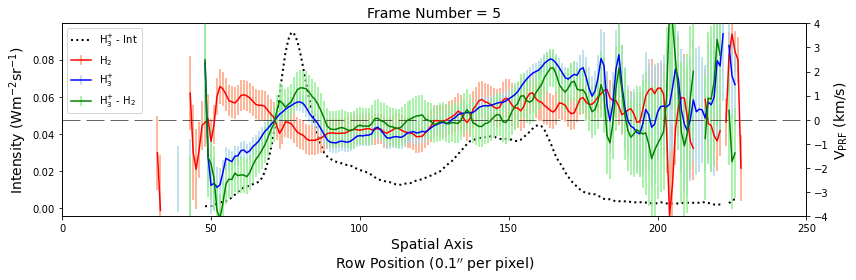

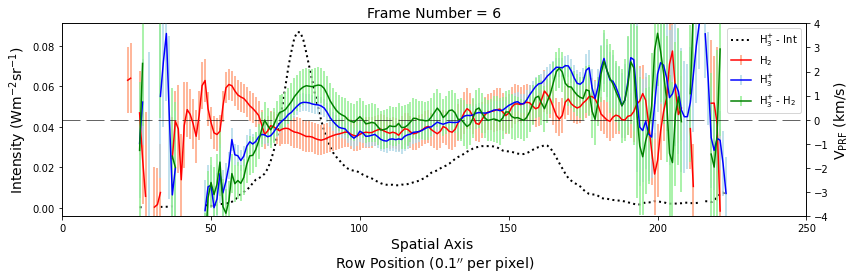

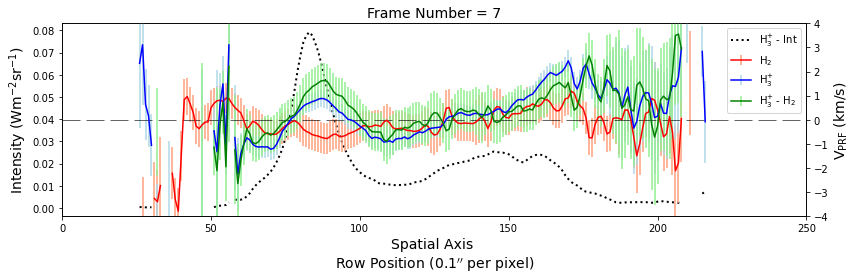

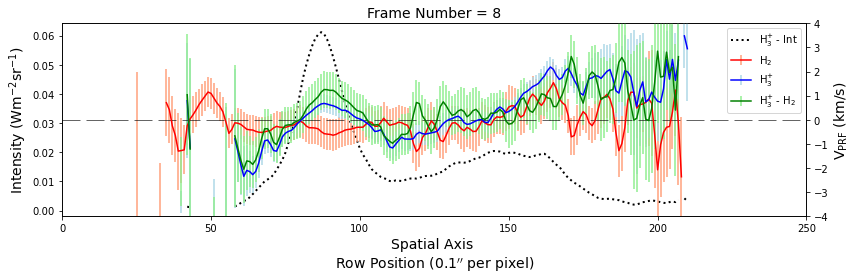

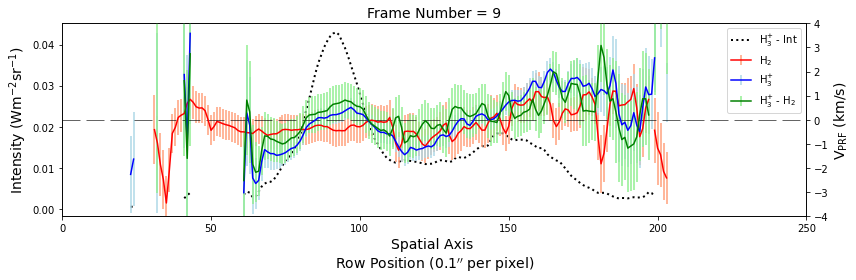

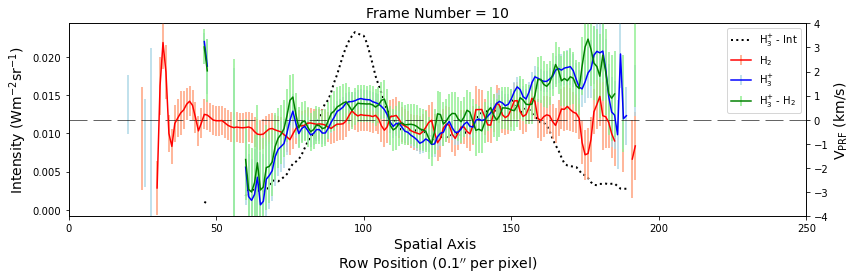

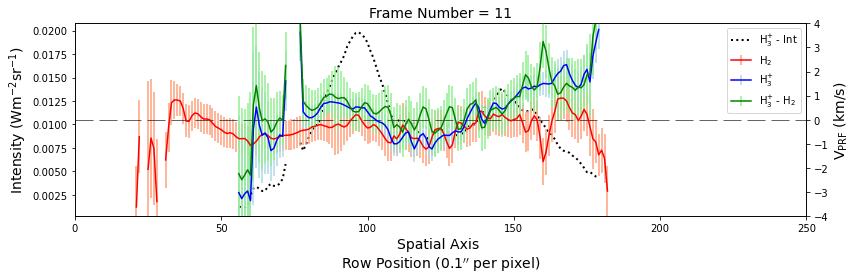

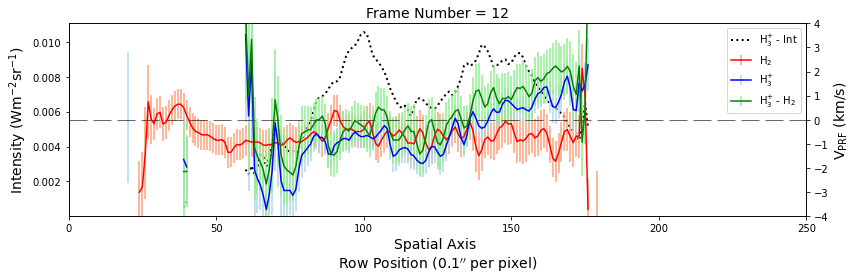

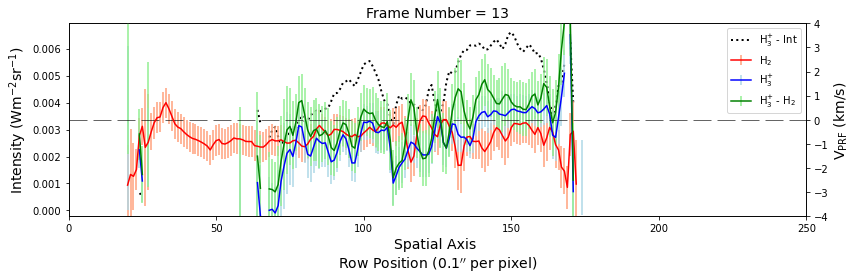

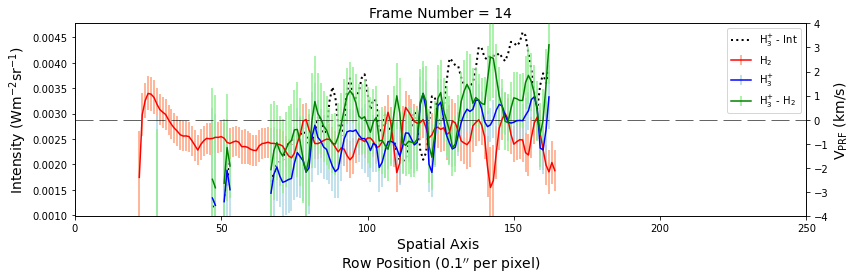

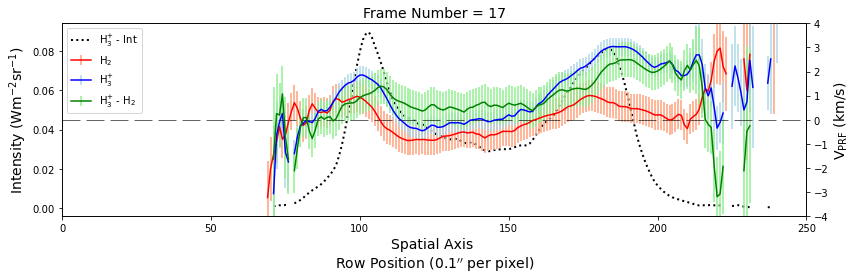

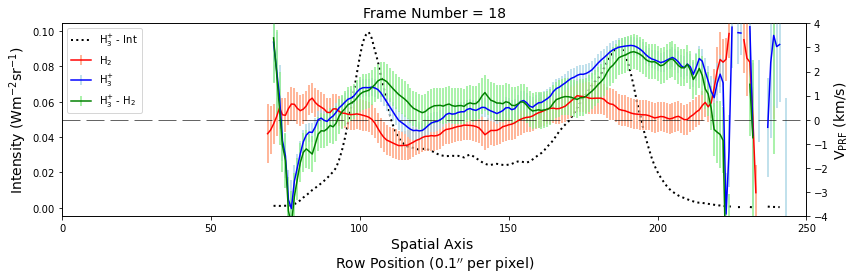

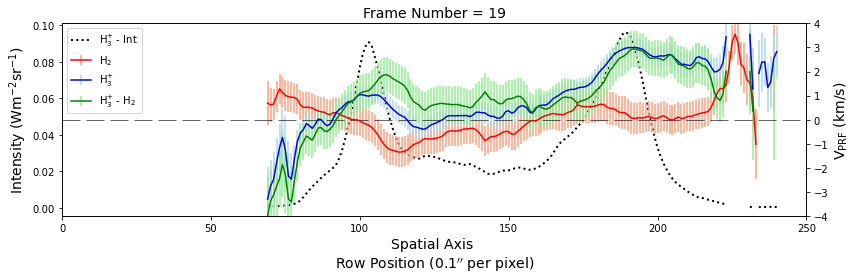

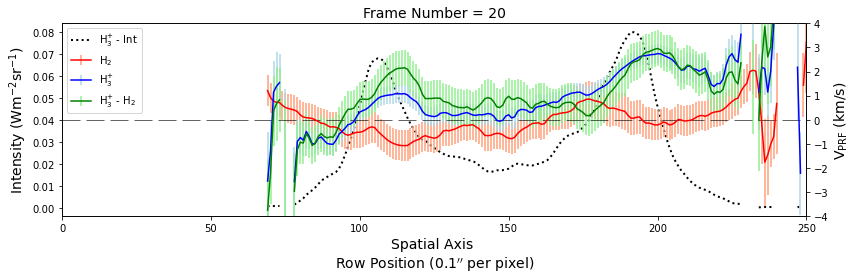

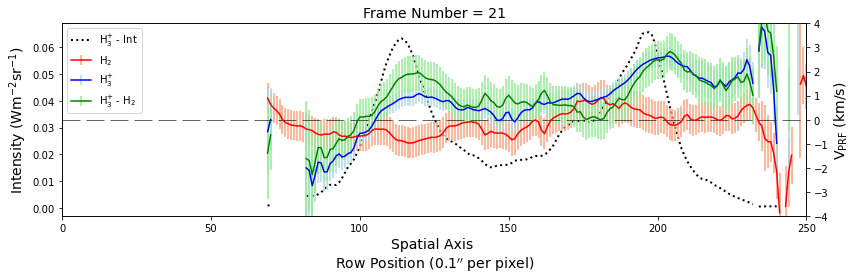

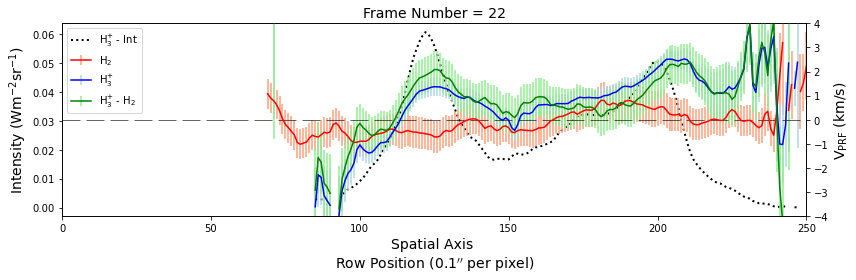

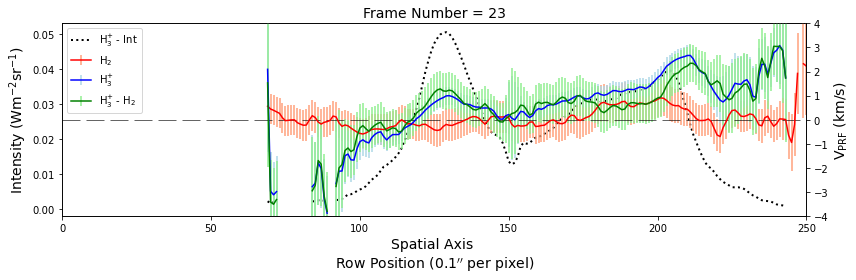

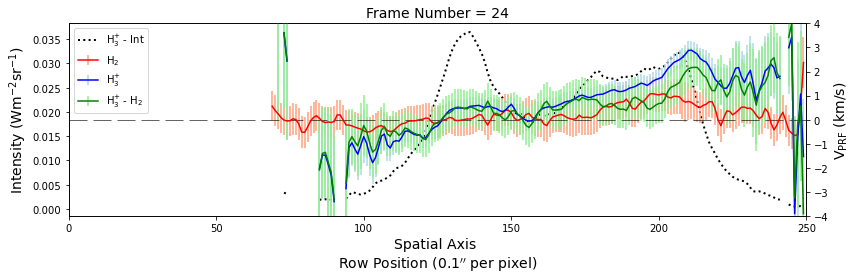

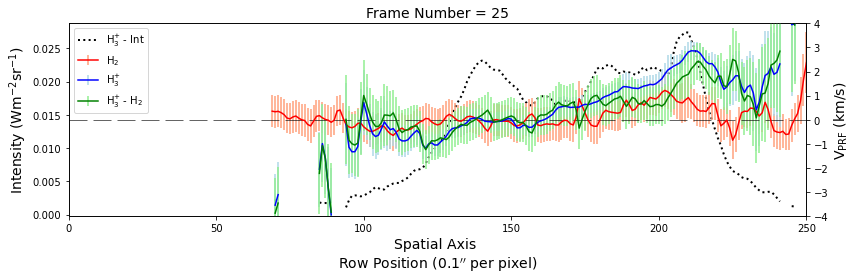

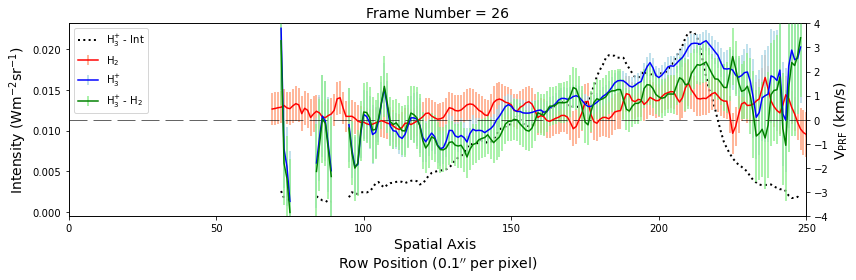

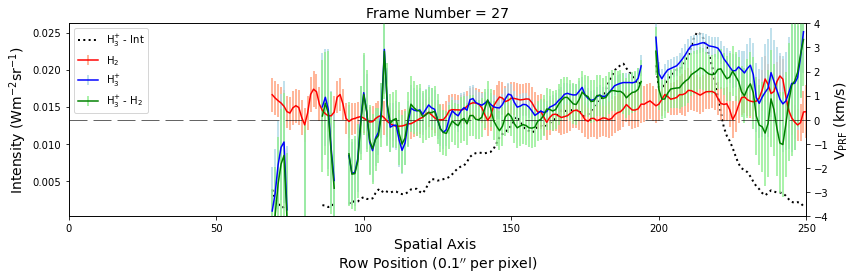

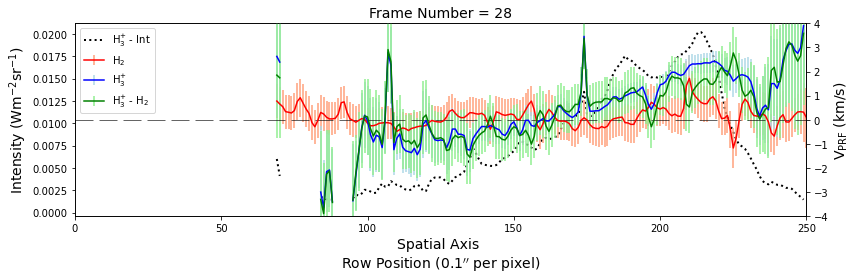

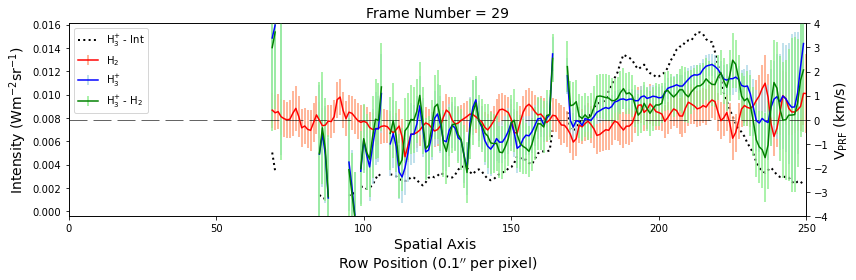

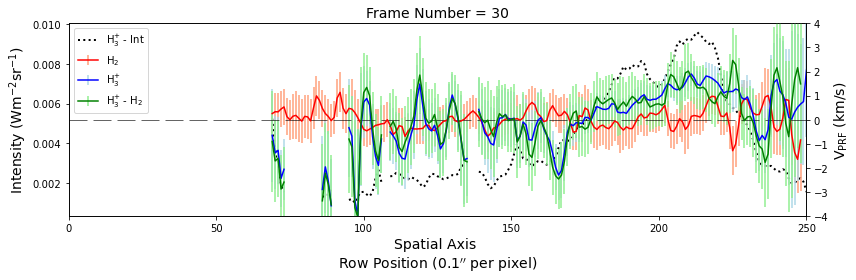

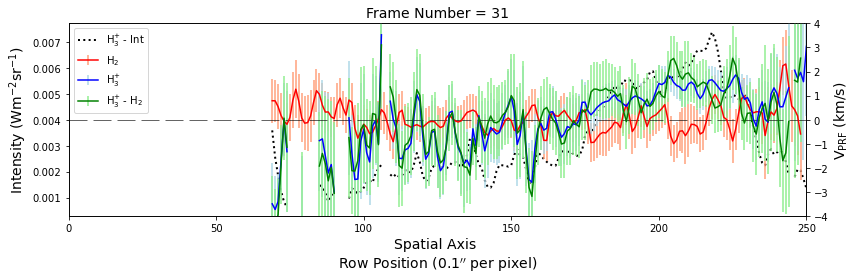

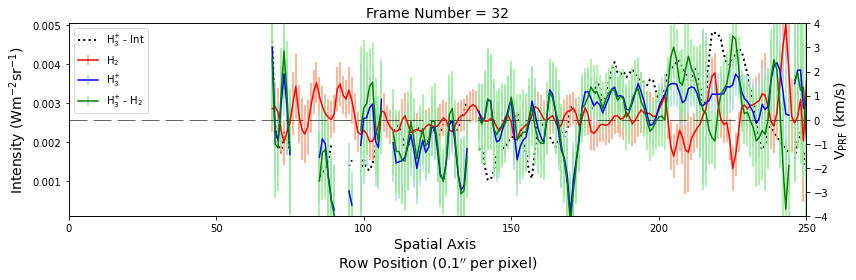

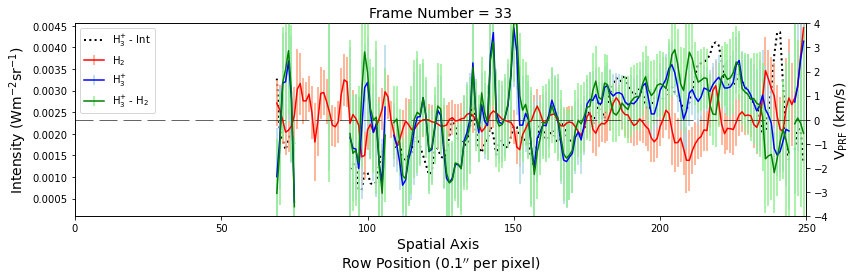

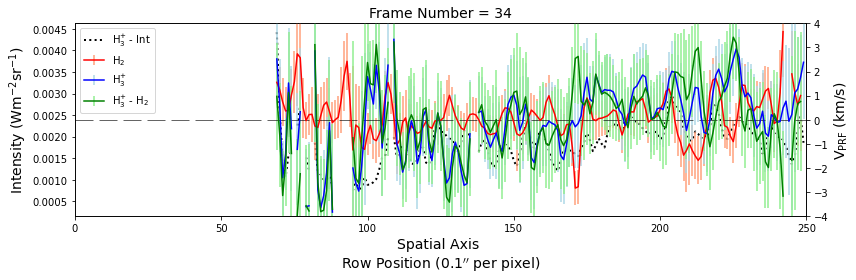

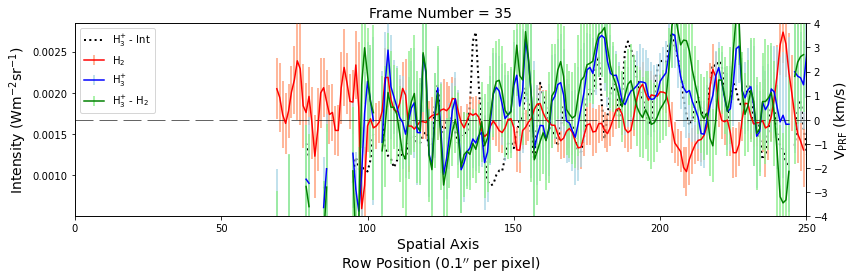

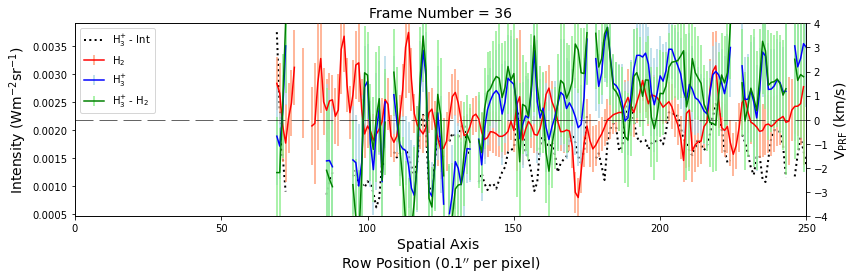

In [17]:
a2 = h2_vprf*(-1)
b2 = h3p_vprf*(-1)

c2 = b2 - a2
err2 = np.sqrt((h3p_verr)**2 + (h2_verr)**2)



num=17

# xnew = np.linspace(0,299,300)
# int2 = (h3p_int/np.nanmax(h3p_int[num])*8-4)
# len(h3p_vprf)
for i in range(len(h3p_vprf)):
    if i not in (0,15,16,37):  
        xnew = np.linspace(0,299,300)
        int2 = (h3p_int/np.nanmax(h3p_int[i])*7.8-3.9)
        
        fig, ax = plt.subplots(figsize = (12, 4))
        plt.title('Frame Number = '+ str(i), fontsize=14)
        
        ax2 = ax.twinx()
        ax.plot(xnew, h3p_int[i], color='k', ls=':', label='H$_3^{+}$ - Int', lw=2)
        ax2.errorbar(xnew, a2[i], yerr=h2_verr[i], color='red', ecolor='lightsalmon', label='H$_2$')
        ax2.errorbar(xnew, b2[i], yerr=h3p_verr[i], color='blue', ecolor='lightblue', label='H$_3^{+}$')
        ax2.errorbar(xnew, c2[i], yerr=err2[i], color='green', ecolor='lightgreen', label='H$_3^{+}$ - H$_2$')
        
        # giving labels to the axises
        ax.set_xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
        ax.set_ylabel('Intensity (Wm$^{-2}$sr$^{-1}$)', fontsize=14)

        # secondary y-axis label
        ax2.set_ylabel('V$_{\mathrm{PRF}}$ (km/s)', fontsize=14)
        
#         plt.figure(figsize=(12,4))
#         plt.plot(a2[num], label='H2')
#         plt.plot(b2[num], label='H3+')
#         plt.plot(xnew, int2[i], color='teal', ls='-', label='H$_3^{+}$ - Int')
#         plt.errorbar(xnew, a2[i], yerr=h2_verr[i], color='red', ecolor='gray', label='H$_2$')
#         plt.errorbar(xnew, b2[i], yerr=h3p_verr[i], color='blue', ecolor='lightblue', label='H$_3^{+}$')
        plt.axhline(y=0, xmin=0, xmax=250, color='black', ls='dashed', dashes=(30, 10), lw=0.6)
        plt.xlim(0,250)
        plt.ylim(-4,4)
#         plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
#         plt.ylabel('V$_{\mathrm{PRF}}$ (km/s)', fontsize=14)
        
        lines, labels = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc=0)
        
        plt.tight_layout()
        
        plt.savefig(imgpath + '/h2_h3p_int_vel_compare_fr_' +str(i), dpi=400, bbox_inches='tight', facecolor='white')